In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Linear Combinations ##

Let $\mathbf{X}$ be multivariate normal with mean vector $\boldsymbol{\mu}$ and covariance matrix $\boldsymbol{\Sigma}$. Definition 3 says that all linear combinations of elements of $\mathbf{X}$ are normal too. This makes many calculations straightforward. Here is an example in two dimensions.

### Sum and Difference ###
Let $\mathbf{X} = [X_1 ~ X_2]^T$ have bivariate normal distribution mean vector $\boldsymbol{\mu} = [\mu_1 ~ \mu_2]^T$ and covariance matrix $\boldsymbol{\Sigma}$.

Then the sum $S = X_1 + X_2$ has the normal distribution with mean $\mu_1 + \mu_2$ and variance

$$
Var(S) ~ = ~ Var(X_1) + Var(X_2) + 2Cov(X_1, X_2)
$$

which you can calculate based on $\boldsymbol{\Sigma}$.

The difference $D= X_1 - X_2$ has the normal distribution with mean $\mu_1 - \mu_2$ and variance

$$
Var(D) ~ = ~ Var(X_1) + Var(X_2) - 2Cov(X_1, X_2)
$$

No matter what the linear combination of elements of $\mathbf{X}$, its distribution is normal. To identify the parameters of the distribution, work out the mean and variance using properties of means and variances and then find the necessary components from the mean vector and covariance matrix of $\mathbf{X}$. Once you have the mean and variance, you are all set to find probabilities by using the normal curve as usual.

### Joint Distribution of Linear Combinations ###
Definition 2 implies that the joint distribution of a finite number of linear combinations of $\mathbf{X}$ is multivariate normal. In the example above, not only does each of $S$ and $D$ have a normal distribution, the joint distribution of $S$ and $D$ is bivariate normal. We found the mean vector and all but one element of the covariance matrix in the calculations above. The remaining element is

$$
Cov(S, D) ~ = ~ Cov(X_1 + X_2, X_1 - X_2) ~ = ~ Var(X_1) - Var(X_2)
$$
by bilinearity and symmetry of covariance.

### Marginals ###
Each $X_i$ is a linear combination of elements of $\mathbf{X}$: the combination that has coefficient 1 at index $i$ and 0 everywhere else. So each $X_i$ has the normal distribution. The parameters of this normal distribution can be read off the mean vector and covariance matrix: $E(X_i) = \boldsymbol{\mu}(i)$ and $Var(X_i) = \boldsymbol{\Sigma}(i, i)$.

But be warned: **the converse is not true**. If all the marginals of a random vector are normal, the joint distribution need not be multivariate normal.

### A Cautionary Tale ###
The cells below show the empirical joint and marginal distributions of an interesting data set. Read the comment at the top of each cell to see what is being computed and displayed.

In [2]:
# Generate 100,000 iid standard normal points

x = stats.norm.rvs(size=100000)
y = stats.norm.rvs(size=100000)
t = Table().with_column(
    'X', x,
    'Y', y
)

In [3]:
# Select just those where both elements have the same sign

new = t.where(t.column(0) * t.column(1) > 0)

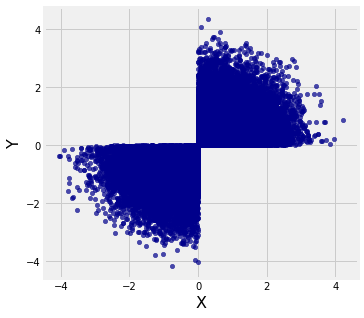

In [4]:
# The restricted pairs are not jointly normal;
# that shape isn't an ellipse

new.scatter(0, 1)

/Users/dominiccroce/anaconda3/envs/textbook/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


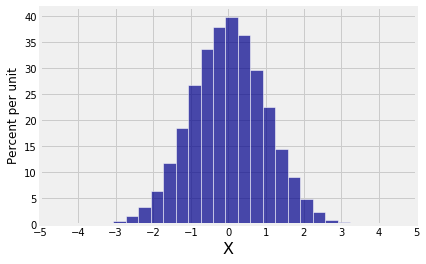

In [5]:
# Empirical distribution of horizontal coordinate

new.hist(0, bins=25, ec='w')
plt.xticks(np.arange(-5, 6));

/Users/dominiccroce/anaconda3/envs/textbook/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


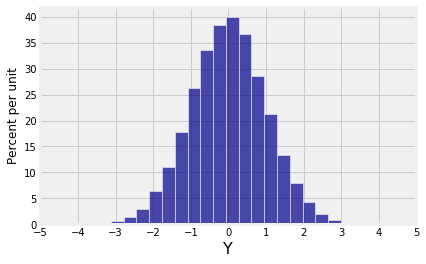

In [6]:
# Empirical distribution of vertical coordinate

new.hist(1, bins=25, ec='w')
plt.xticks(np.arange(-5, 6));

Both marginals are normal but the joint distribution is far from bivariate normal. 

To get the formula for the joint density of these variables, start with the circularly symmetric joint density of two i.i.d. standard normals and restrict it to Quadrants 1 and 3. This leaves out half of the volume under the original surface, so remember to multiply by 2 to make the total volume under the new surface equal to 1.

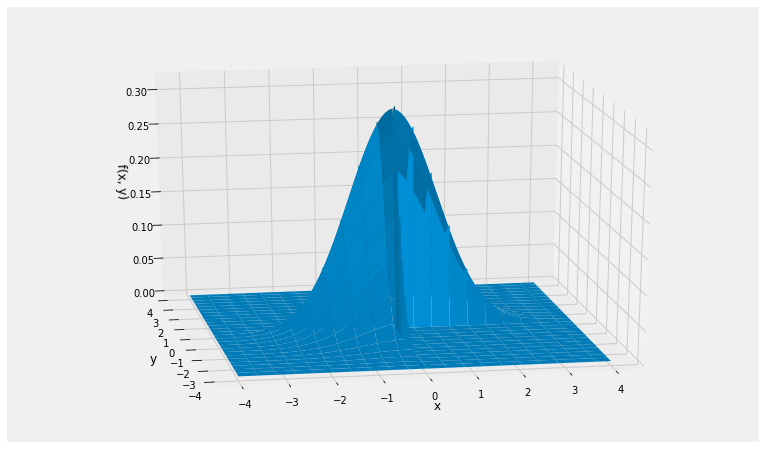

In [7]:
def new_density(x,y):
    if x*y > 0:
        return 1/np.pi * np.exp(-0.5*(x**2 + y**2))
    else:
        return 0

Plot_3d((-4, 4), (-4, 4), new_density, rstride=4, cstride=5)